<a href="https://colab.research.google.com/github/marcojr93/data-science-portifolio/blob/main/I2A2%20Desafio%202%20-%20Anomalia%20em%20sistema%20de%20bombeamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO 2 - REALIZAR ANÁLISE EXPLORATÓRIA DOS DADOS

**Dataset:** https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

**Contexto do conjunto de dados**:

Os dados foram adquiridos por equipe que cuida da bomba de água de uma pequena área distante da cidade grande. Houve 7 falhas no sistema no último ano. Essas falhas causaram grandes problemas para muitas pessoas e também levaram a sérios problemas pessoais para algumas famílias. A equipe não consegue ver nenhum padrão nos dados quando o sistema falha, então não tem certeza de onde colocar mais esforços.

**Observação**:

No texto, há o relato de que houve 7 falhas nesse sistema no último ano mas a equipe não conseguiu identificar nenhum padrão. Portanto, o principal foco dessa análise será encontrar uma correlação entre os dados ou um padrão que permita prever essas falhas antes de ocorrerem

# 1 - Tratamento dos dados

Importação das bibliotecas necessárias para importação e tratamento dos dados

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action = 'ignore')

from google.colab import drive # Iremos improtar o dataset pelo GoogleDrive
from google.colab import auth

import time
from tqdm import tqdm

In [31]:
drive.mount('/content/drive/') # Realizar importação dos dados via Google Drive

auth.authenticate_user() # Autenticação do usuario
     

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Datasets Colab/sensor.csv') # Iremos importar e abrir o dataset direto do google drive e chamá-lo de df

In [33]:
df.head() # A função head permite visualizar as 5 primeiras linhas do dataset para um rápido entendimento de como está organizado o dataset

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [34]:
df.info() # Como existem muitas colunas, precisamos primeiro verificar se existe algum campo faltante, ou com o tipo incorreto para devidos tratamentos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

É sabido pela descrição do problema, que a coluna 'machine_status' possui 3 valores possíveis, NORMAL, RECOVERING e BROKEN. Mas caso o dataset fosse desconhecido, podemos utilizar a seguinte linha de código para avaliar o que são os objetos representados na coluna.

In [35]:
df['machine_status'].value_counts() # Assim, podemos verificar como está dividido o dataset entre os status indicados pelo equipamento

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

Existe uma grande diferença na quantidade de dados por colunas, para analisar de forma mais detalhada, podemos verificar a quantidadede de valores nulos por coluna com a função isnull.

In [36]:
df.isnull().sum() # Essa função irá somar a quantidade de valores nulos em cada coluna

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


É notável a quantidade de dados faltantes nos sensores 15 e 50, além da coluna Unnamed que não irá agregar valor à análise, portanto, podemos já excluí-las do estudo.

In [37]:
df = df.drop(['Unnamed: 0', 'sensor_15', 'sensor_50'], axis =1) # A função drop, será utilizada para excluir completamente as colunas passadas na linha de código como parâmetrona analise e também a coluna 'sensor15', que não há nenhum valor inputado e a coluna 'sensor_50' que possui muitos valores faltantes em relação aos outros sensores
df.info() # Aqui utilizamos novamente a função info para avaliar se as mudanças foram executadas corretamente


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_16       220289 non-null  float64
 17  sensor_17 

Precisamos também nos certificar que não há valores duplicados. Como cada linha do dataset corresponde a uma informação coletada naquele minuto, iremos avaliar se existem colunas repetidas com o mesmo timestamp.

In [38]:
df[df['timestamp'].duplicated(keep=False)]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status


Podemos excluir todas as linhas e colunas que possuem algum valor NaN, para podermos trabalhar com o dataset mais balanceado em relação à quantidade de dados. 

OBS: Mesmo removendo esses valores, o dataset consegue trabalhar com 86% dos problemas o que é um bom número tratando-se de confiabilidade de equipamento.

In [45]:
df = df.dropna(how = "all", axis = 1) # Essa função irá deletar os valores vazios nas colunas
df = df.dropna(how = "any", axis = 0) # E essa função irá deletar os valores vazios nas linhas
print(df.info()) # Novamente utilizaremos a função info para avaliar as modificações

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195815 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       195815 non-null  datetime64[ns]
 1   shift           195815 non-null  object        
 2   sensor_00       195815 non-null  float64       
 3   sensor_01       195815 non-null  float64       
 4   sensor_02       195815 non-null  float64       
 5   sensor_03       195815 non-null  float64       
 6   sensor_04       195815 non-null  float64       
 7   sensor_05       195815 non-null  float64       
 8   sensor_06       195815 non-null  float64       
 9   sensor_07       195815 non-null  float64       
 10  sensor_08       195815 non-null  float64       
 11  sensor_09       195815 non-null  float64       
 12  sensor_10       195815 non-null  float64       
 13  sensor_11       195815 non-null  float64       
 14  sensor_12       195815 non-null  flo

Converter a coluna timestamp para datetime é importante para permitir manipular as informações de tempo com mais facilidade e eficiência. Quando a coluna timestamp é lida como string, é mais difícil fazer operações de adição ou subtração de tempo, ordenar os dados temporalmente e agrupar dados por intervalos de tempo específicos.

In [39]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # Faremos a conversão da coluna timestamp (objeto) para o tipo datetime

# 2 - Análise exploratória dos dados

Já que estamos falando de uma empresa que roda 24h, podemos dividir os dias em turnos, assim poderemos coletar informação como: Quais turnos possuem maior indice de quebras? Essa pergunta pode ser de grande valia para equipe de manutenção da empresa.

In [40]:
shift = pd.Series([]) # Vamos criar uma série chamada shift (turno, em inglês)

# Classificar os turnos conforme a divisão do dia (essa divisão não segue nenhuma regra específica)

for i in tqdm(range(df.shape[0])):
  if (df['timestamp'][i].hour >= 6) and (df['timestamp'][i].hour < 14):
    shift[i] = "Morning"
  elif (df['timestamp'][i].hour >= 14) and (df['timestamp'][i].hour < 23):
    shift[i] = "Evening"
  else:    shift[i] = "Night"


100%|██████████| 220320/220320 [16:25<00:00, 223.47it/s]


In [41]:
df.insert(1, 'shift', shift) # Criar coluna 'shift' com os valores da série criada

In [42]:
counts = df.groupby(['shift', 'machine_status']).size().unstack(fill_value=0)
print(counts)

machine_status  BROKEN  NORMAL  RECOVERING
shift                                     
Evening              3   77868        4749
Morning              0   68384        5056
Night                4   59584        4672


Informação muito importante, nenhuma das falhas ocorreram durante o turno da manhã (das 6h as 14h). Assim, recomenda-se uma rotatividade ou reforço dos times dos turnos da noite e madrugada.

Podemos avaliar também graficamente como se comportam os equipamentos e entender em que momento ocorrem cada um dos status.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

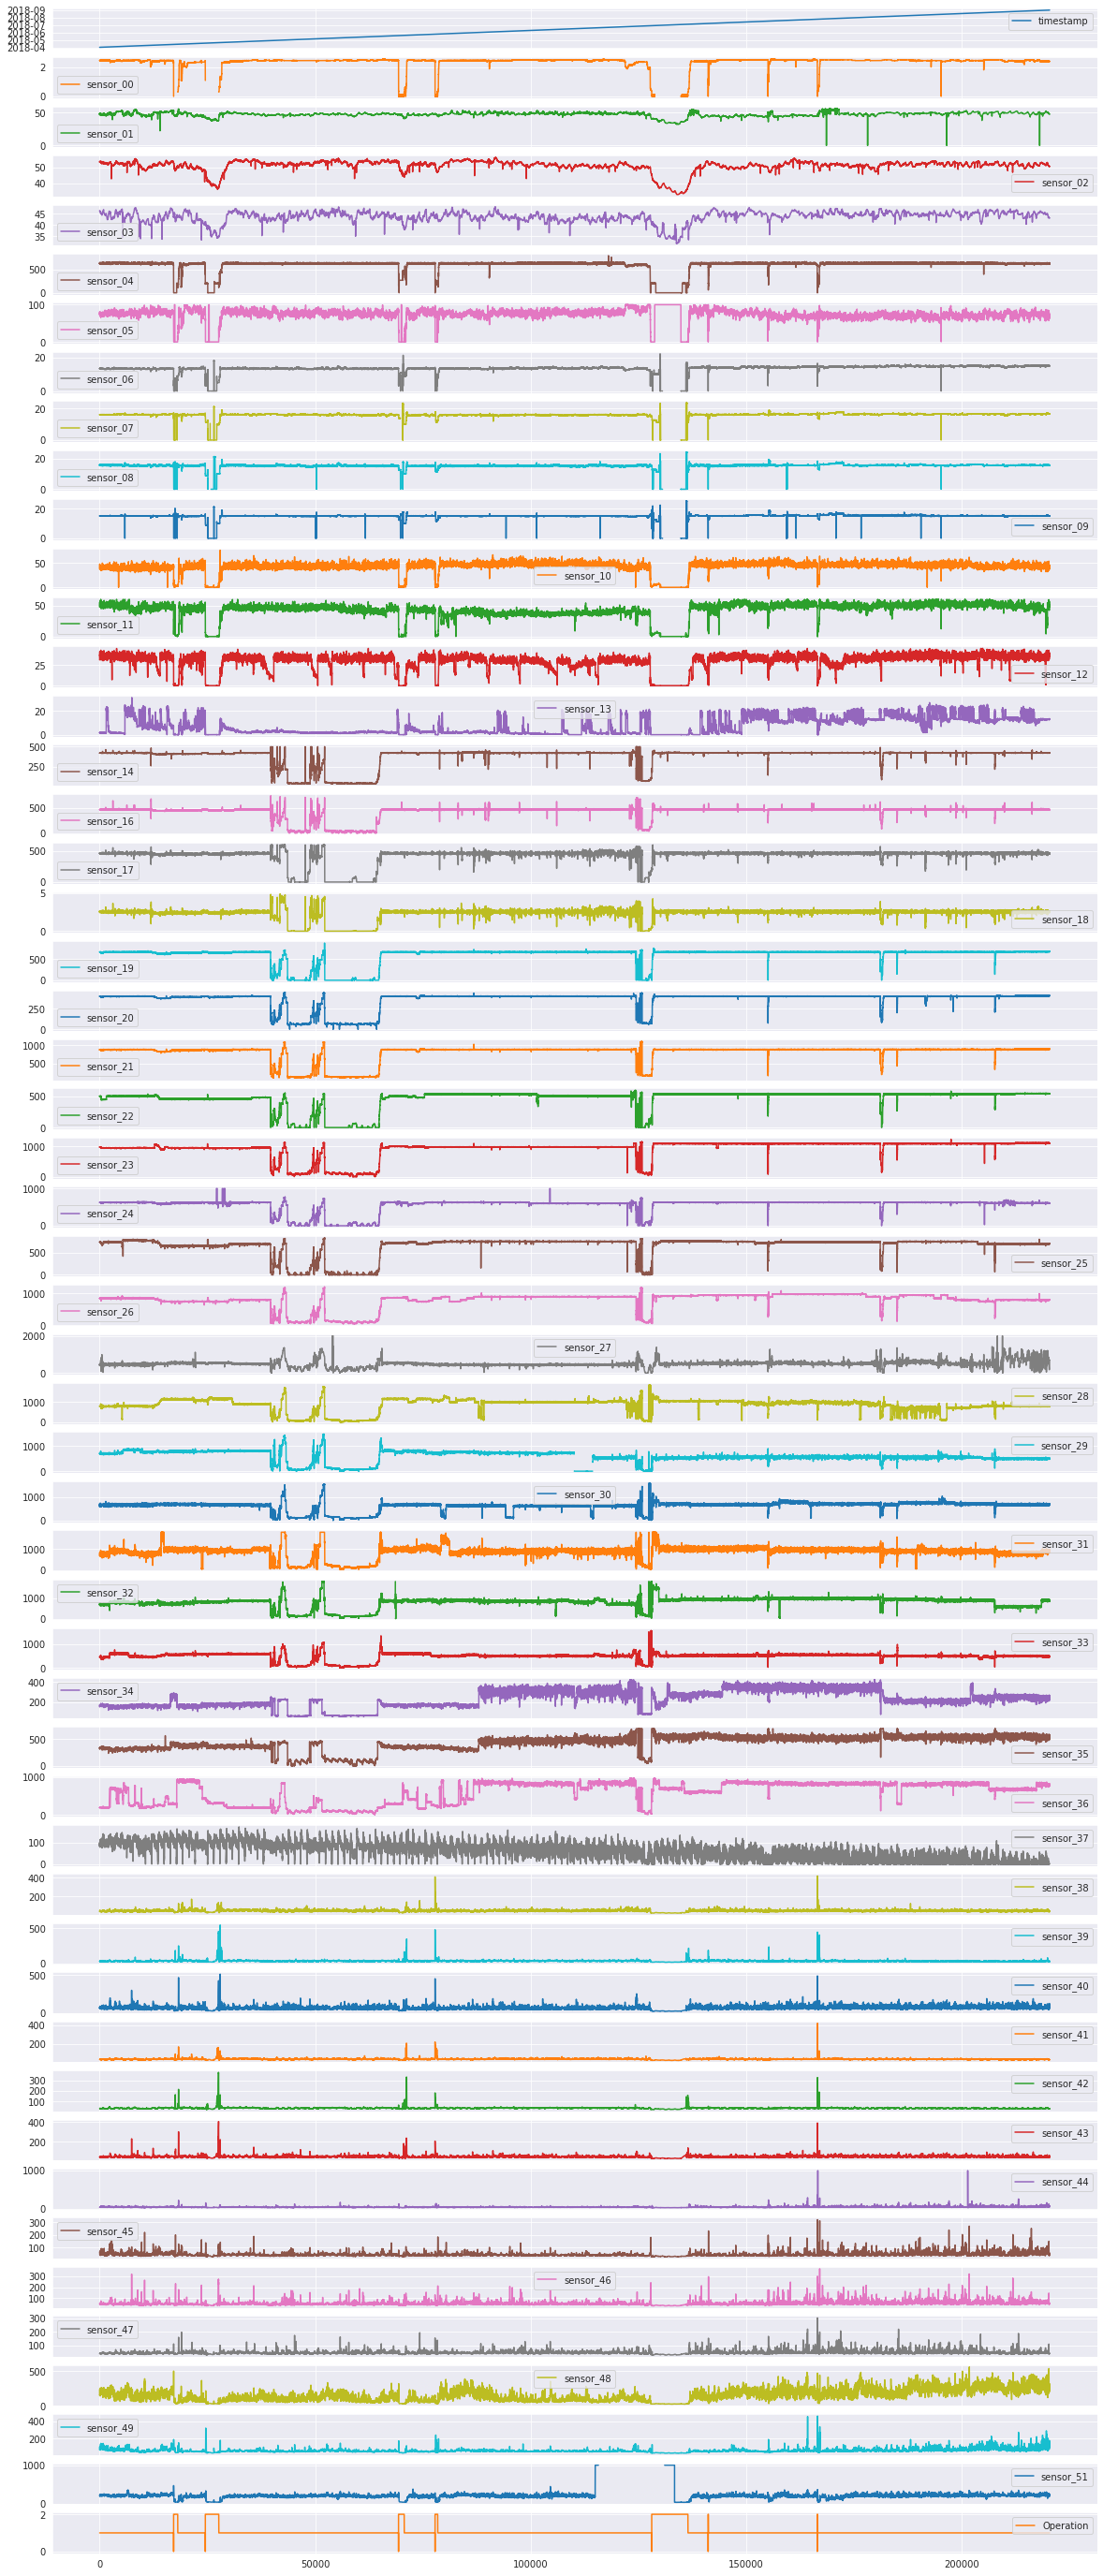

In [44]:
# Transformar machine_status de string para tipo inteiro 
conditions = [(df['machine_status'] == 'BROKEN'), 
              (df['machine_status'] == 'NORMAL'), 
              (df['machine_status'] == 'RECOVERING')]
choices = [0,1,2] # Existem três condições possíveis
df['Operation'] = np.select(conditions, choices, default=0)
     

# Plotando os sensores
status = [(df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [0, 1, 2]
df['Operation'] = np.select(status, choices, default=0)
df.plot(subplots=True, sharex=True, figsize=(20, 50))

É possível perceber que os sensores medem grandezas diferentes, podendo ser fluxo, corrente de motor, vibração, temperatura etc e alguns deles possuem pares de redundância, ou seja, vários sensores no mesmo ponto de medição. Outra conclusão que tiramos a partir do gráfico "Operation" criado para mostrar no tempo, os status da maquina, é que as situações de RECOVERING sempre ocorrem após uma falha e o as 3 primeiras falhas possuem um MTBF semelhante, podendo ser relacionado à uma falha de manutenção preditiva.

## 2.1 - Análise via Sweetviz

A biblioteca Sweetviz é uma ferramenta do Python que ajuda na análise exploratória de dados, gerando relatórios estatísticos e visualizações atraentes automaticamente. O Sweetviz é capaz de gerar relatórios descritivos de dados categóricos e numéricos, correlações, distribuições e padrões de dados em poucas linhas de código, permitindo que os usuários ganhem insights valiosos sobre seus dados de maneira rápida e fácil.

In [46]:
# Instalação
!pip install sweetviz
# Importação
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.8 MB/s eta 0:00:00


In [47]:
import IPython
from IPython.display import Image


In [48]:
analyze_report = sv.analyze(df)
analyze_report.show_html('Relatório Sweetviz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report Relatório Sweetviz.html was generated.


OBS: Como há a possibilidade de download do relatório, deixaremos essas próximas linhas de código comentadas.

In [49]:
# Visualizar relatório
# IPython.display.HTML('Relatório Sweetviz.html')

# 3 - Análise do fenômeno de falha (Broken)

Como dito no contexto do problema, há a necessidade de eliminar as falhas recorrentes e para isso é preciso entender como elas ocorrem.

Graficamente, fica muito díficil identificar padrões de operações que antecedem as falhas.

Como alternativa, podemos rodar um modelo de machine learning chamado Decision Tree (árvore de decisão), para ver se há uma lógica bem definida para o acontecimento das falhas.

In [50]:
# Bibliotecas a serem utilizadas
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.model_selection import train_test_split # Importa a biblioteca train_test_split para separar dados de treino e dados de teste

Para utilização desse modelo, iremos criar um df1, cópia do df, para realizarmos algumas modificações necessárias.

In [51]:
df1 = df.drop(['timestamp'], axis = 1)

In [ ]:
# col_list = df1.columns.values.tolist() # Precisamos converter as colunas com os nomes dos sensores para uma lista e assim treinarmos nosso modelo (poupar tempo)
# print(col_list)

Com base no relatório do Sweetviz, iremos criar a árvore de decisão conforme os sensores de maior relevância nos problemas, os seja, os sensores de maior correlação.

In [52]:
# Criando uma série para armazenar valores de Y
y = df1["machine_status"]
# Criando uma série para armazenar valores de X
X = df1[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_51']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2811)

In [53]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test))) # Segregação dos dados de treino e teste em 75% e 25% respectivamente

modelo = DecisionTreeClassifier() # Criação do modelo de classificação
modelo.fit(raw_treino_x, treino_y) # Treinamento do modelo
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100 # Calculo da acurácia do modelo
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 131196 elementos e testaremos com 64619 elementos
A acurácia foi 99.97%


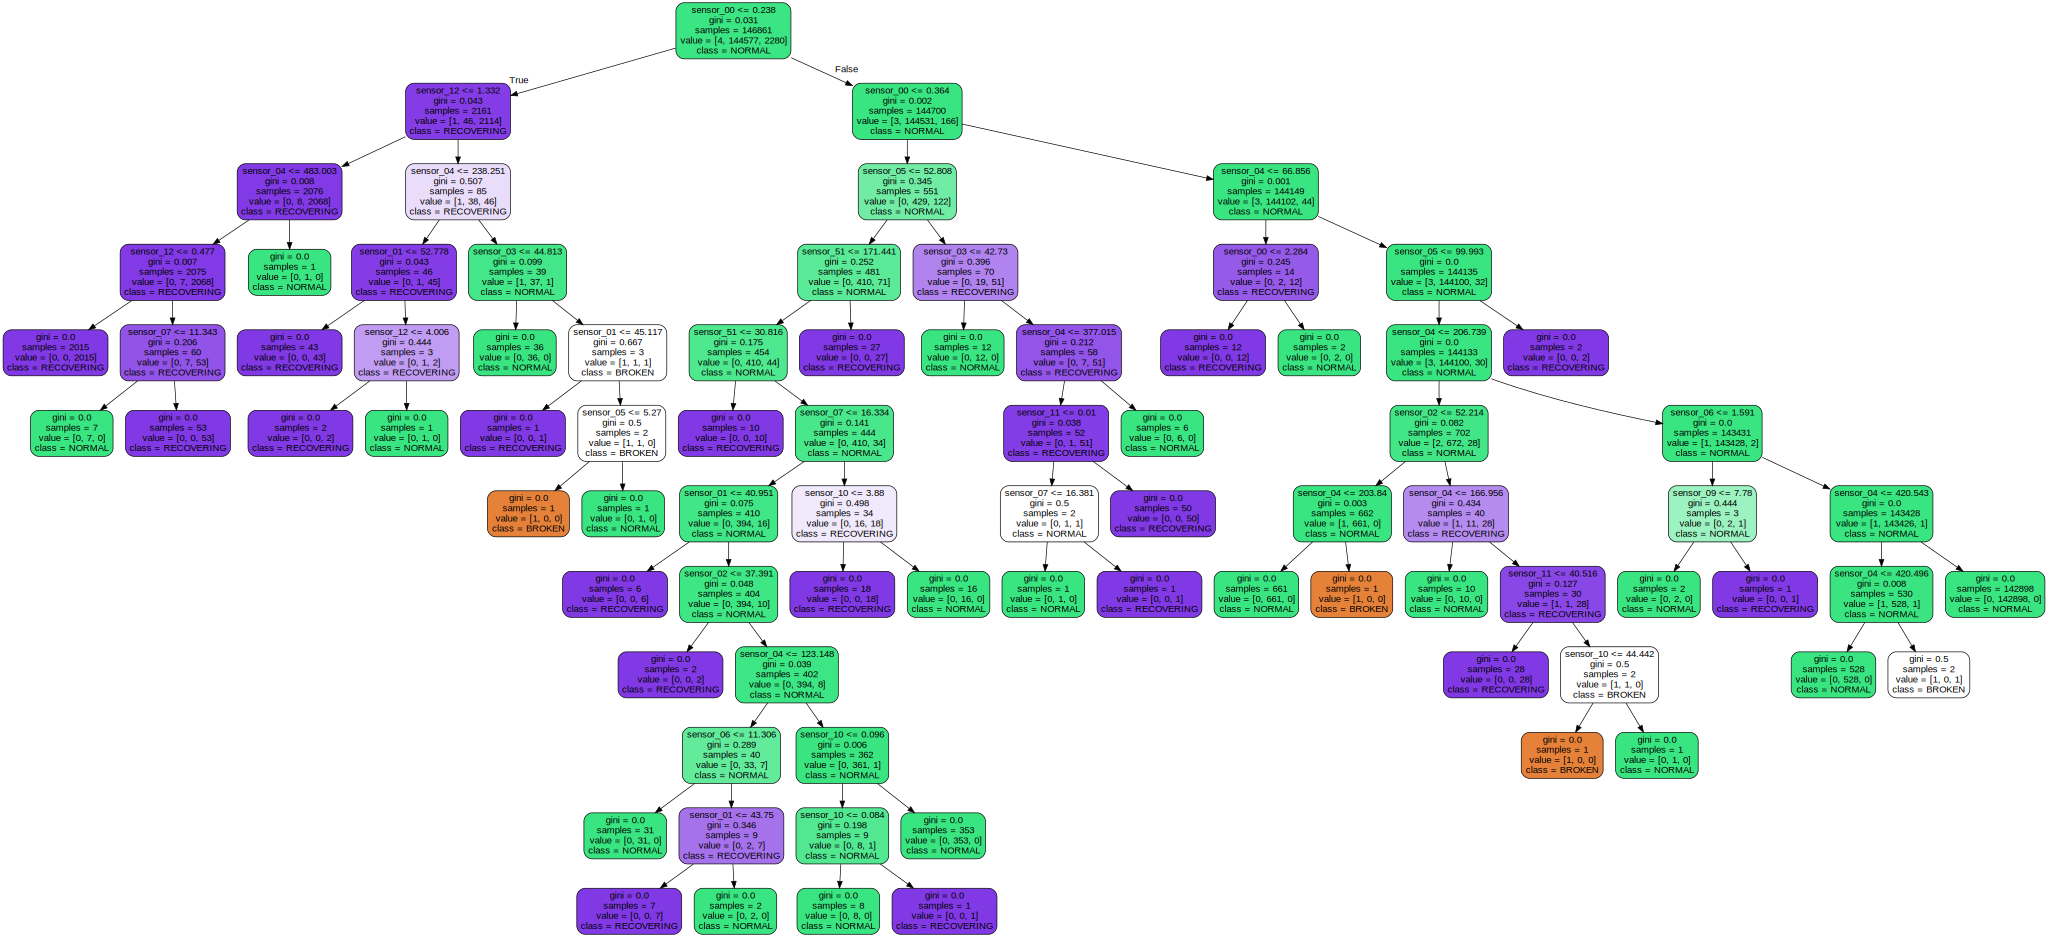

In [54]:
# Vamos visualizar a árvore de decisões para avaliar como os defeitos acontecem
features = X.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["BROKEN", "NORMAL","RECOVERING"]) # Status da máquina
grafico = graphviz.Source(dot_data)
grafico

A árvore gerada, cria uma série de informações sobre a combinação de valores entre os sensores que levam às falhas.

In [56]:
# Podemos exportar essa imagem para tentar analisar melhor o passa a passo da árvore de decisões

from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True,feature_names = features, class_names=["BROKEN", "NORMAL","RECOVERING"])

grafico = pydotplus.graph_from_dot_data(dot_data.getvalue())  
grafico.write_png('arvore_decisao.png')

True

# 4 - Estudo por modelo de machine learning

Podemos tentar criar modelos preditivos, que com base em uma regra baseada na árvore de decisão. Para isso, vamos criar uma função chamada "classifica" que irá criar uma nova coluna para cada linha do timestamp classificando as combinações de valores em alertas (alerts).

In [59]:
def classifica(x):
    if x['sensor_00'] <= 0.238 and x['sensor_12'] <= 1.332 and x['sensor_04'] <= 238.251 and x['sensor_03'] <= 44.813:
        return "1"
    elif x['sensor_00'] >= 0.238 and x['sensor_04'] <= 206.739 and x['sensor_05'] <= 99.993 and x['sensor_02'] <= 52.214:
        return "1"
    elif x['sensor_04'] <= 205.739 and x['sensor_06'] <= 1.591:
        return "1"
    else:
        return "0"

df['alerts'] = df.apply(classifica, axis = 1)

Podemos usar a função head() para verificar a criação da nova coluna.

In [60]:
df.head()

,timestamp,shift,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status,Operation,alerts
0,2018-04-01 00:00:00,Night,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL,1,0
1,2018-04-01 00:01:00,Night,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL,1,0
2,2018-04-01 00:02:00,Night,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL,1,0
3,2018-04-01 00:03:00,Night,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL,1,0
4,2018-04-01 00:04:00,Night,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL,1,0


Após a criação da nova coluna, podemos verificar quantos alertas foram gerados conforme a regra criada. Essa regra pode ser utilizada pela equipe de confiabilidade da empresa para intervir no sistema antes de alguma falha ocorrer.

In [61]:
df['alerts'].value_counts()

0    192585
1      3230
Name: alerts, dtype: int64

Novamente, podemos verificar em qual turno há a maior quantidade de alertas e o padrão da noite e madrugada se repete. Assim podemos supor algumas condições impactantes no sistema:

- Baixo treinamento dos turnos da noite e madrugada
- Queda da temperatura ambiente influencia no processo
- Tempo de reconexão maior durante estes turnos

In [97]:
counts_alerts = df.groupby(['shift', 'alerts']).size().unstack(fill_value=0)
print(counts_alerts)

alerts       0     1
shift               
Evening  72261  1387
Morning  64041   817
Night    56283  1026


Com os alertas criados, podemos tentar criar modelos preditivos por meio de algoritmos de machine learning

## 4.1 - Regressão Logística

Em resumo, a regressão logística é um método estatístico que permite fazer previsões sobre resultados binários usando variáveis explicativas e uma função matemática para calcular a probabilidade do evento ocorrer.

In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
# Criando uma série para armazenar valores de Y
y = df["alerts"]
# Criando uma série para armazenar valores de X
X = df[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_51']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2811)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)
print("Modelo criado")

Modelo criado


In [74]:
y_pred = modelo.predict(X_test)
print(y_pred)

['0' '0' '0' ... '0' '0' '0']


In [75]:
predict_proba = modelo.predict_proba(X_test)
print(predict_proba)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [76]:
colunas = X_test.columns.to_list()
colunas

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_51']

In [77]:
entrada = X_test[0:1]
entrada

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_51
172511,2.504745,47.82986,50.82465,44.96527,637.5,66.11096,14.60503,17.62876,17.15856,16.6305,45.51939,53.18956,24.96412,137.1528


In [78]:
linha = df.iloc[[0]]
linha

,timestamp,shift,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status,Operation,alerts
0,2018-04-01,Night,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,201.3889,NORMAL,1,0


In [81]:
acuracia = metrics.accuracy_score(y_test, y_pred)
print("A acurácia do modelo de regressão logística é %.2f%%" % (acuracia*100))

A acurácia do modelo de regressão logística é 98.31%


In [82]:
precisao = metrics.precision_score(y_test, y_pred,pos_label= '1')
print("A precisão do modelo de regressão logística é %.2f%%" % (precisao*100))

A precisão do modelo de regressão logística é 0.00%


In [83]:
recall = metrics.recall_score(y_test, y_pred, pos_label = '1')
print("O recall do modelo de regressão logística é %.2f%%" % (recall*100))

O recall do modelo de regressão logística é 0.00%


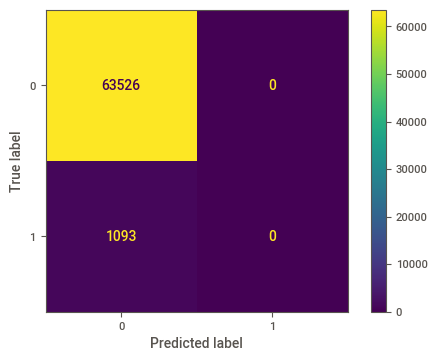

In [84]:
matriz_confusao = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,display_labels=modelo.classes_)
disp.plot()

In [85]:
# Curva AUC ROC
# Parse das variáveis
y_test2_int = [int(x) for x in y_test]
y_pred2_int = [int(x) for x in y_pred]

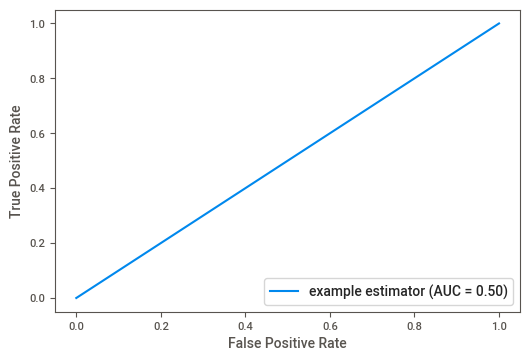

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2_int, y_pred2_int)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.show()

## 4.2 - Random Forest classifier

O algoritmo de machine learning random forest é uma técnica usada para criar modelos preditivos. Ele usa várias árvores de decisão aleatórias para criar um modelo geral mais preciso e estável.

Cada árvore de decisão é criada usando um subconjunto aleatório de dados e um conjunto aleatório de variáveis explicativas. Isso ajuda a reduzir o risco de overfitting (quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados) e melhora a precisão geral do modelo.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [88]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

pred_rdm = clf.predict(X_test)
print(pred_rdm)

['0' '0' '0' ... '0' '0' '0']


In [89]:
acuracia = metrics.accuracy_score(y_test, pred_rdm, sample_weight=None)
print("A acurácia do modelo Random Forest é %.2f%%" % (acuracia*100))

precisao = metrics.precision_score(y_test, pred_rdm, pos_label='1', sample_weight=None)
print("A precisão do modelo Random Forest é %.2f%%" % (precisao*100))

sensibilidade = metrics.recall_score(y_test, pred_rdm, pos_label='1', sample_weight=None)
print("A sensibilidade do modelo Random Forest é %.2f%%" % (sensibilidade*100))

A acurácia do modelo Random Foreste é 98.31%
A precisão do modelo Random Foreste é 0.00%
A sensibilidade do modelo Random Foreste é 0.00%


In [90]:
y_test3_int = [int(x) for x in y_test]
y_pred3_int = [int(x) for x in pred_rdm]

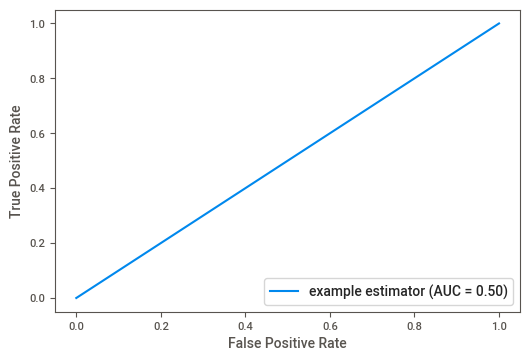

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test3_int, y_pred3_int)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.show()

## 4.3 - MLP Classifier

O MLPClassifier é um algoritmo de aprendizado de máquina que utiliza redes neurais artificiais para resolver problemas de classificação. MLP significa Perceptron de Múltiplas Camadas (em inglês, Multi-Layer Perceptron).

Em termos simples, uma rede neural é um modelo de aprendizado de máquina que tenta imitar o funcionamento do cérebro humano, com neurônios artificiais conectados em camadas para processar informações. O MLPClassifier é um tipo específico de rede neural que usa uma ou mais camadas ocultas (camadas entre a camada de entrada e a camada de saída) para aprender padrões complexos nos dados de entrada.

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = 35, random_state=1, max_iter=300)
clf.fit(X_train_scaled, y_train)

pred_mlp = clf.predict(X_test_scaled)

In [95]:
acuracia = metrics.accuracy_score(y_test, pred_mlp)
print("O valor da acurácia do MLP Classifier é %.2f%%" % (acuracia*100))

precisao = metrics.precision_score(y_test, pred_mlp, pos_label= '1')
print("O valor da precisão do MLP Classifier é %.2f%%" % (precisao*100))

sensibilidade = metrics.recall_score(y_test, pred_mlp, pos_label= '1')
print("O valor da sensibilidade do MLP Classifier é %.2f%%" % (sensibilidade*100))

O valor da acurácia do MLP Classifier é 98.31%
O valor da precisão do MLP Classifier é 0.00%
O valor da sensibilidade do MLP Classifier é 0.00%


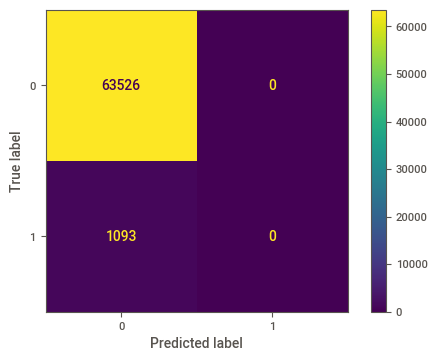

In [96]:
matriz_confusao = metrics.confusion_matrix(y_test, pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,display_labels=clf.classes_)
disp.plot()

## 4.4 - Conclusões sobre os modelos

Uma acurácia de 100% significa que o modelo está acertando todas as previsões em relação ao conjunto de dados de teste. No entanto, isso não significa necessariamente que o modelo está fazendo um bom trabalho de prever todas as classes.

Se o recall e a precisão são 0%, significa que o modelo não está fazendo nenhuma previsão positiva correta. Isso pode acontecer quando o modelo está muito enviesado para uma determinada classe e está prevendo apenas uma classe o tempo todo, independentemente dos dados de entrada. Por exemplo, se o conjunto de dados de teste tiver uma classe muito maior que a outra, o modelo pode simplesmente prever a classe majoritária o tempo todo e, portanto, ter uma acurácia de 100%, mas um recall e precisão de 0% para a classe minoritária.

Portanto, uma acurácia de 100% não é suficiente para avaliar a qualidade do modelo. É importante verificar outras métricas, como recall e precisão, para entender como o modelo está se saindo para cada classe. Se o modelo tiver um recall e precisão muito baixos para uma determinada classe, isso pode ser um sinal de que ele precisa ser ajustado para melhorar sua capacidade de prever essa classe.

# 5 - Conclusões e Recomendações

O dataset, permite extrair muitas informações, porém desbalanceado em relação aos status do sistema, assim fica dificil criar um modelo preditivo sem mais informações sobre o próprio sistema.

Em relação às recomendações de engenharia, da para citar alguns pontos importantes:

- Os resultados são bem definidos em relação aos turnos, não houveram falhas durante o dia, assim, podemos avaliar a necessidade de reforço ou reciclagem de treinamento dos times da noite e da madrugada.

- Os intervalos entre as primeiras 3 falhas são bem característicos de falhas de manutenção preventiva, o tempo de recorrência entre elas são semelhantes. Como recomendação, podemos sugerir reduzir o tempo de inspeção, antes que a falha venha acontecer.

- Os alertas criados, podem ser aperfeiçoados conforme a inclusão de mais informações e assim, a equipe pode monitorar os equipamentos e receber alertas antes das falhas e posteriormente, evoluir para modelos preditivos.